# Solving the Wholesale Customer Segmentation problem using Hierarchical Clustering
Hierarchical Clustering is a type of unsupervised machine learning algorithm used to group similar data points together. The goal of this algorithm is to create a hierarchy of clusters, where each cluster is a subset of the previous one.

The algorithm starts by treating each data point as its own cluster. It then repeatedly merges the two closest clusters, until all points are in the same cluster or a stopping criterion is met. The result is a tree-like structure called a dendrogram, which shows the hierarchy of the clusters.

## Agglomerative and Divisive
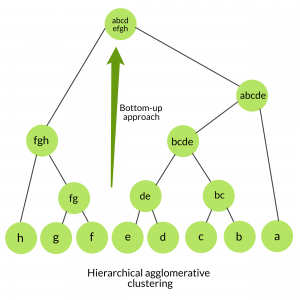 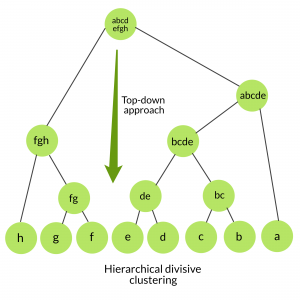

There are two main types of Hierarchical Clustering: Agglomerative and Divisive. Agglomerative clustering starts with individual points and merges them into larger clusters, while Divisive clustering starts with all points in one cluster and splits them into smaller clusters.

The mathematical intuition behind Hierarchical Clustering is based on the concept of distance between data points. The algorithm uses a distance metric, such as Euclidean distance or Manhattan distance, to calculate the distance between each pair of data points. The two closest clusters are then merged, and the process is repeated until all points are in the same cluster.

The goal of this challenge is to divide a wholesale distributor's clientele into groups based on the amount of money they spend annually on various product categories, such as milk, groceries, regions, etc.

Before applying Hierarchical Clustering to segment the clients, let's first investigate the data.

We'll import the necessary libraries first.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Wholesale_customers_data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


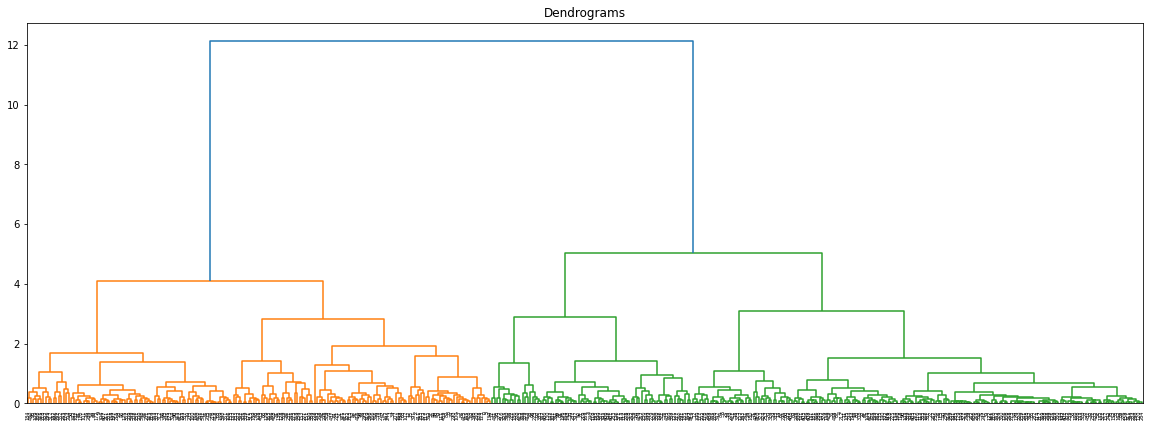

In [6]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The samples are on the x-axis, and the separation between them is shown on the y-axis. The blue line represents the vertical line with the greatest distance, thus we can choose a threshold of 6 and cut the dendrogram at that point:

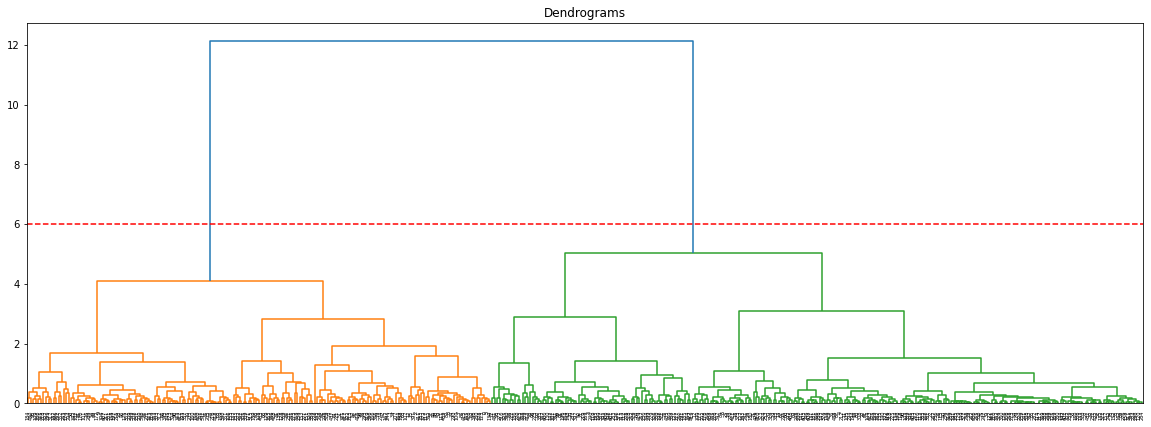

In [7]:
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

This line cuts the dendrogram at two locations, resulting in two clusters. Applying hierarchical clustering to two clusters now

In [8]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

Given that we defined 2 clusters, we can see the values of 0s and 1s in the output. Points in the first cluster are represented by 0 and those in the second cluster by 1, respectively. Now, let's see the two clusters.

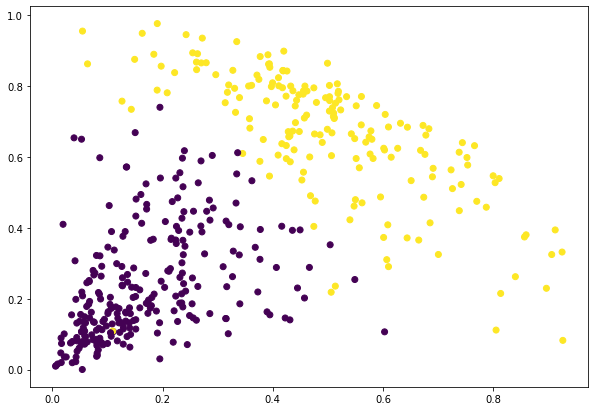

In [9]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

Now we can clearly visualize the two clusters here. This is how we can implement hierarchical clustering in Python.